In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('50_Stratups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset = df.sort_values(by="Administration", ascending =True)

n = dataset.shape[0]
y2 = dataset["Profit"]
x2 = dataset["Administration"]

In [4]:
dataset2 = df.sort_values(by="Marketing Spend", ascending =True)

y3 = dataset2["Profit"]
x3 = dataset2["Marketing Spend"]

In [5]:
dataset3 = df.sort_values(by="R&D Spend", ascending =True)

y = dataset3["Profit"]
x = dataset3["R&D Spend"]

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

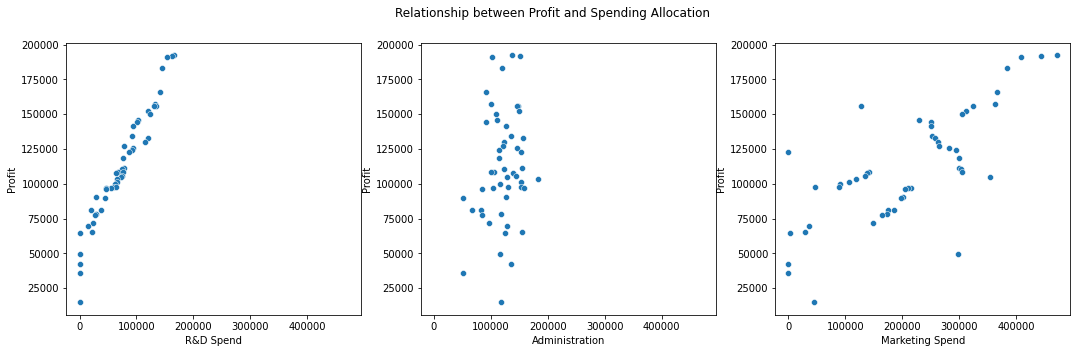

In [6]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(18,5))
fig.suptitle('Relationship between Profit and Spending Allocation')
sns.scatterplot(data=df, x="R&D Spend", y="Profit", ax=axes[0])
sns.scatterplot(data=df, x="Administration", y="Profit", ax=axes[1])
sns.scatterplot(data=df, x="Marketing Spend", y="Profit", ax=axes[2])

In [7]:
# slope, intercept, r_value, p_value, std_err = linregress(r_and_d, profit)

In [8]:
n = df.shape[0]
t_0025 = -t.ppf(0.025, 49)

In [9]:
def calculate_basic(shape,x,y):
    x_mean = x.mean()
    y_mean = y.mean()
    syy = 0
    sxy = 0
    sxx= 0 
    for i in range(shape):
        syy += (y[i] - y_mean)**2
        sxx += (x[i] - x_mean)**2
        sxy += (y[i] - y_mean)*(x[i]- x_mean)
    b1 = sxy/sxx
    b0 = y_mean - b1*x_mean
    sse = syy-b1*sxy
    s = np.sqrt(sse/(shape-2))
    
    return syy, sxx, sxy, b1, b0, sse, s, x_mean

In [10]:
def coefficient_of_determination(n, xaxis, yaxis):
    syy, sxx, sxy, b1, b0, sse, s, xmean = calculate_basic(n, xaxis, yaxis)
    coeff = sxy/np.sqrt(sxx*syy)
    return coeff**2

In [11]:
def plot_set_up(n, x, y):
    syy, sxx, sxy, b1, b0, sse, s, x_mean = calculate_basic(n , x, y)
    t_value = -t.ppf(0.025, 49)
    
    b_b = (b0 + b1*x) - t_value*s*np.sqrt((1/len(x)) + (x-x_mean)**2/(sxx))
    b_a = (b0 + b1*x) + t_value*s*np.sqrt((1/len(x)) + (x-x_mean)**2/(sxx))
    mean_x_y = (b_a-b_b)/2 + b_b
    
    b_b_y0 = (b0+b1*x) - t_value*s*np.sqrt(1+(1/len(x)) + (x - x_mean)**2/(sxx))
    b_a_y0 = (b0+b1*x) + t_value*s*np.sqrt(1+(1/len(x)) + (x - x_mean)**2/(sxx))
    
    return b_b, b_a, mean_x_y, b_b_y0, b_a_y0

<h1> Regresi

In [12]:
lower_bound, upper_bound, meanxy, y0_lower, y0_upper = plot_set_up(n,x,y)
lower_bound2, upper_bound2, meanxy2, y0_lower2, y0_upper2 = plot_set_up(n,x2,y2)
lower_bound3, upper_bound3, meanxy3, y0_lower3, y0_upper3 = plot_set_up(n,x3,y3)

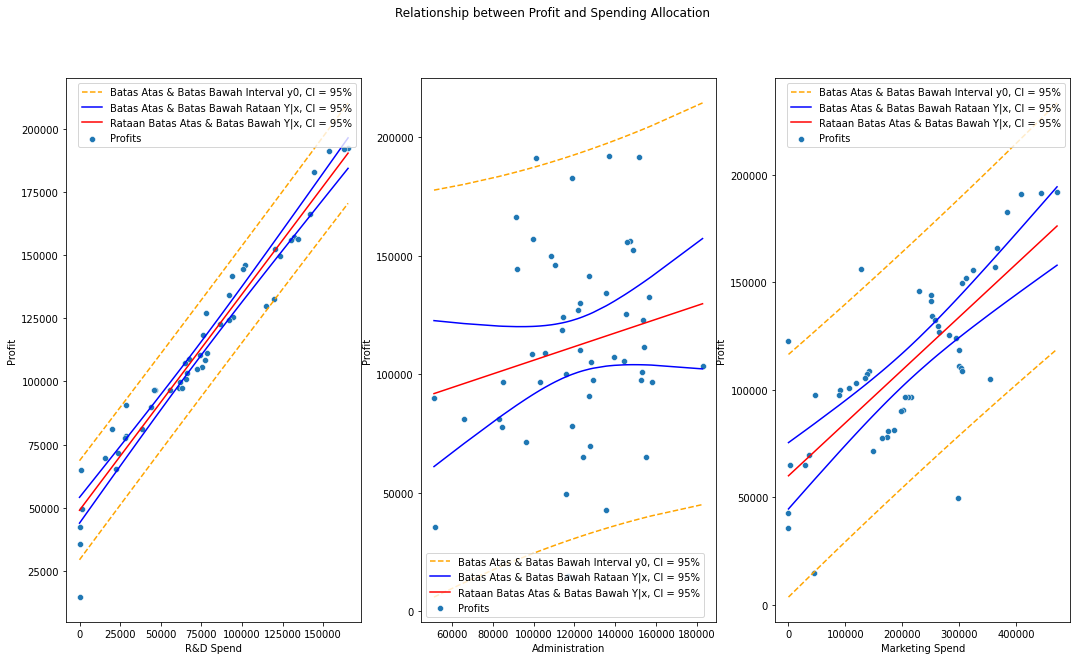

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18,10))
fig.suptitle('Relationship between Profit and Spending Allocation')

sns.scatterplot(data=df, x="R&D Spend", y="Profit", ax=axes[0], label="Profits")
axes[0].plot(x,y0_upper,c='orange',linestyle='dashed',label='Batas Atas & Batas Bawah Interval y0, CI = 95%')
axes[0].plot(x,y0_lower,c='orange',linestyle='dashed')
axes[0].plot(x,upper_bound,c='blue',label='Batas Atas & Batas Bawah Rataan Y|x, CI = 95%')
axes[0].plot(x,lower_bound,c='blue')
axes[0].plot(x,meanxy,c='red',label='Rataan Batas Atas & Batas Bawah Y|x, CI = 95%')

sns.scatterplot(data=df, x="Administration", y="Profit", ax=axes[1], label="Profits")
axes[1].plot(x2,y0_upper2,c='orange',linestyle='dashed',label='Batas Atas & Batas Bawah Interval y0, CI = 95%')
axes[1].plot(x2,y0_lower2,c='orange',linestyle='dashed')
axes[1].plot(x2,upper_bound2,c='blue',label='Batas Atas & Batas Bawah Rataan Y|x, CI = 95%')
axes[1].plot(x2,lower_bound2,c='blue')
axes[1].plot(x2,meanxy2,c='red',label='Rataan Batas Atas & Batas Bawah Y|x, CI = 95%')

sns.scatterplot(data=df, x="Marketing Spend", y="Profit", ax=axes[2], label="Profits")
axes[2].plot(x3 ,y0_upper3,c='orange',linestyle='dashed',label='Batas Atas & Batas Bawah Interval y0, CI = 95%')
axes[2].plot(x3,y0_lower3,c='orange',linestyle='dashed')
axes[2].plot(x3,upper_bound3,c='blue',label='Batas Atas & Batas Bawah Rataan Y|x, CI = 95%')
axes[2].plot(x3,lower_bound3,c='blue')
axes[2].plot(x3,meanxy3,c='red',label='Rataan Batas Atas & Batas Bawah Y|x, CI = 95%')

axes[0].legend()
axes[1].legend()
axes[2].legend()

<h1> Pertanyaan Diskusi

<h1> a

In [14]:
cod_rd = coefficient_of_determination(n, x, y)
cod_rd

0.946535316080439

In [15]:
cod_admin =  coefficient_of_determination(n, x2, y2)
cod_admin

0.0402871407775723

In [16]:
cod_marketing =  coefficient_of_determination(n, x3, y3)
cod_marketing

0.5591535746115514

R&D dan Profit = Linear dengan korelasi kuat <br>
Administration dan Profit = Tidak ada Korelasinya <br>
Marketing dan Profit = Linear dengan korelasi sedang

<h1> b

In [17]:
def predict(pred_val, x, y):
    x1 = x[10]
    x2 = x[20]
    y1 = y[10]
    y2 = y[20]
    m = (y2-y1)/(x2-x1)
    c = y2-m*x2

    return m*pred_val + c

In [18]:
low_pred = predict(125000, x, y0_lower)
high_pred = predict(125000, x, y0_upper)
print("Estimasi profit untuk spending sebesar $125000 USD dengan tingkat kepercayaan 95% adalah ${:.2f} <= Profit <= ${:.2f}".format(low_pred, high_pred))

Estimasi profit untuk spending sebesar $125000 USD dengan tingkat kepercayaan 95% adalah $136571.95 <= Profit <= $175066.70


<h1> c

In [19]:
low_pred = predict(50000, x, y0_lower)
high_pred = predict(50000, x, y0_upper)
print("Estimasi profit untuk spending sebesar $50000 USD dengan tingkat kepercayaan 95% adalah ${:.2f} <= Profit <= ${:.2f}".format(low_pred, high_pred))

Estimasi profit untuk spending sebesar $50000 USD dengan tingkat kepercayaan 95% adalah $72708.78 <= Profit <= $110786.15


In [20]:
t_val = -t.ppf(0.025, 49)
spending = 50000
syy, sxx, sxy, b1, b0, sse, s, x_mean = calculate_basic(n, x, y)
y_hat = b1*spending + b0

In [21]:
bat_baw = y_hat - t_val*s*np.sqrt(1+(1/n)+((spending-x_mean)**2/(sxx)))
bat_ats = y_hat + t_val*s*np.sqrt(1+(1/n)+((spending-x_mean)**2/(sxx)))

In [22]:
bat_baw, bat_ats

(72585.32121386574, 110909.6141625194)

<h1> d

In [23]:
def find_spending(target, x, y):
    x1 = x[10]
    x2 = x[20]
    y1 = y[10]
    y2 = y[20]
    m = (y2-y1)/(x2-x1)
    c = y2-m*x2
    
    return (target-c)/m

In [24]:
min_rd_spending = find_spending(150000, x, y0_upper)

In [25]:
print("Minimum Spending yang perlu dikeluarkan startup dalam R&D untuk mendapat profit $150000 adalah ${:.2f}".format(min_rd_spending))

Minimum Spending yang perlu dikeluarkan startup dalam R&D untuk mendapat profit $150000 adalah $95753.17


Text(0.5, 1.0, 'Profit vs R&D Spending')

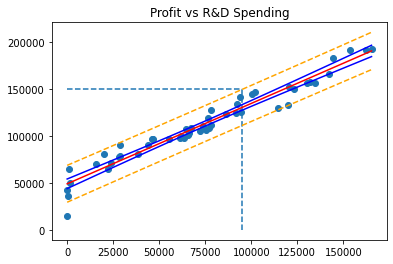

In [45]:
# sns.scatterplot(data=df, x="R&D Spend", y="Profit", ax=axes[0], label="Profits")
plt.scatter(x,y)
plt.plot(x,y0_upper,c='orange',linestyle='dashed',label='Batas Atas & Batas Bawah Interval y0, CI = 95%')
plt.plot(x,y0_lower,c='orange',linestyle='dashed')
plt.plot(x,upper_bound,c='blue',label='Batas Atas & Batas Bawah Rataan Y|x, CI = 95%')
plt.plot(x,lower_bound,c='blue')
plt.plot(x,meanxy,c='red',label='Rataan Batas Atas & Batas Bawah Y|x, CI = 95%')
plt.vlines(95000, 0, 150000, linestyle="dashed")
plt.hlines(150000, 0, 95000, linestyle="dashed")
plt.title("Profit vs R&D Spending")